In [1]:
#import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

from sklearn.preprocessing import MinMaxScaler

In [2]:
#read the dataset
df=pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [5]:
#Analyzing the closimg prices
df['Date']=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

C:\Users\INDRANI SEN\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


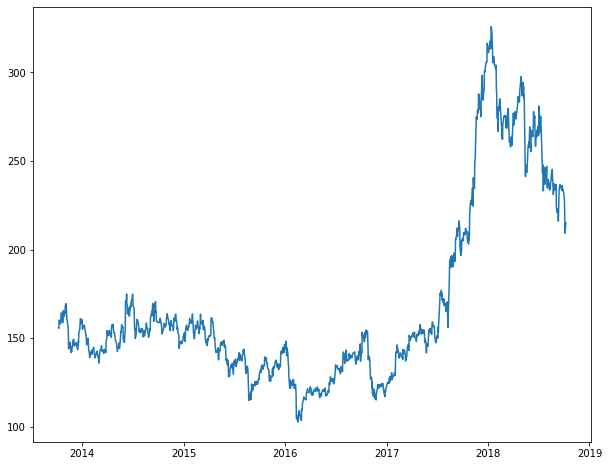

In [6]:
plt.figure(figsize=(10,8))
plt.plot(df['Close'], label='Close price history')

In [7]:
#Sorting the dateset based on date and time
data=df.sort_index(ascending=True, axis=0)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [8]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83


In [11]:
len(data)

1235

In [9]:
#filtering date and close columns
df_new=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    df_new["Date"][i]=data['Date'][i]
    df_new["Close"][i]=data["Close"][i]

In [10]:
df_new.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [12]:
len(df_new)

1235

In [22]:
final=df_new.values

#splitting data into train and test
train=final[0:987,:]
test=final[987:,:]

#Normalize the filtered data using MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
scaled_data=sc.fit_transform(final)



In [23]:
x_train_data,y_train_data=[],[]

In [24]:
for i in range(60,len(train)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

    
#converting x_train and y_train into arrays    
x_train_data=np.array(x_train_data)
y_train_data=np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [34]:
 #Build and train the LSTM model:
    
#create model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


input_data=df_new[len(df_new)-len(test)-60:].values
input_data=input_data.reshape(-1,1)
input_data=sc.transform(input_data)

#compile model
lstm_model.compile(loss='mean_squared_error',optimizer='adam')

#fit the model
lstm_model.fit(x_train_data,y_train_data,epochs=20,batch_size=1,verbose=1)


Epoch 1/20
927/927 [==============================] - 15s 15ms/step - loss: 0.0030
Epoch 2/20
927/927 [==============================] - 14s 15ms/step - loss: 5.1920e-04
Epoch 3/20
927/927 [==============================] - 14s 15ms/step - loss: 4.2836e-04
Epoch 4/20
927/927 [==============================] - 14s 15ms/step - loss: 3.3926e-04
Epoch 5/20
927/927 [==============================] - 14s 15ms/step - loss: 2.5525e-04
Epoch 6/20
927/927 [==============================] - 14s 15ms/step - loss: 2.5261e-04
Epoch 7/20
927/927 [==============================] - 14s 15ms/step - loss: 2.3226e-04
Epoch 8/20
927/927 [==============================] - 14s 15ms/step - loss: 3.0371e-04
Epoch 9/20
927/927 [==============================] - 14s 15ms/step - loss: 2.6392e-04
Epoch 10/20
927/927 [==============================] - 14s 15ms/step - loss: 2.2559e-04
Epoch 11/20
927/927 [==============================] - 14s 15ms/step - loss: 2.3111e-04
Epoch 12/20
927/927 [========================

In [35]:
lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_20 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [37]:
lstm_model.save("saved_model.h5")

In [38]:
#Taking a sample of a dataset to make stock price predictions using the LSTM model:

X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=sc.inverse_transform(predicted_closing_price)

C:\Users\INDRANI SEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


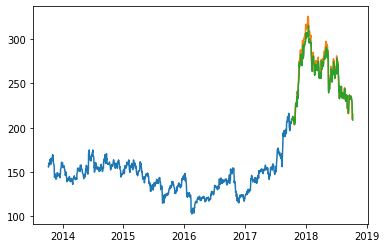

In [43]:
#Visualize the predicted stock costs with actual stock costs:

train_data=df_new[:987]
test_data=df_new[987:]

test_data['Predictions']=predicted_closing_price

plt.plot(train_data["Close"])
plt.plot(test_data[['Close',"Predictions"]])

We can observe that LSTM has predicted stocks almost similar to actual stocks.